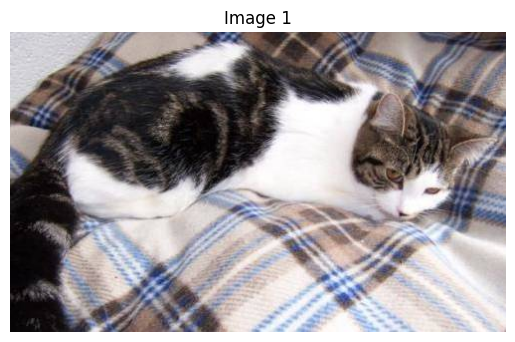

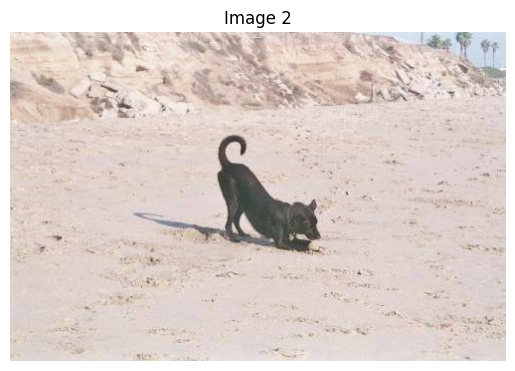

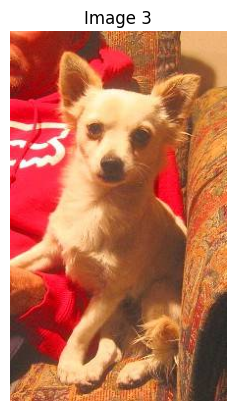

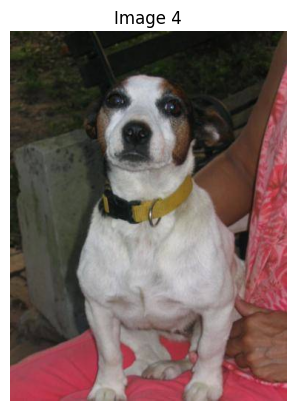

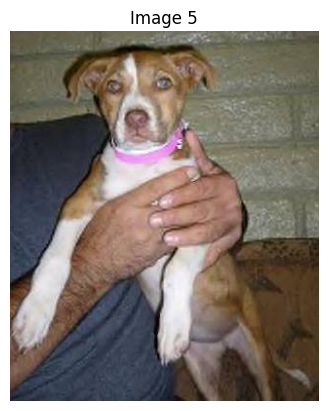

In [13]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory path containing the images
directory_path = '/kaggle/input/training-data/train/train' 

# Get the list of image files in the directory
image_files = os.listdir(directory_path)

# Display the first 5 images
for i, file in enumerate(image_files[:5]):
    img_path = os.path.join(directory_path, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
    plt.show()


In [14]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tqdm import tqdm



In [15]:

def load_images_and_labels(directory_path):
    images = []
    labels = []
    
    for filename in os.listdir(directory_path):
        image_path = os.path.join(directory_path, filename)
        img = cv2.imread(image_path)
        if img is not None:
            images.append(img)
            class_name = filename.split('.')[0]  # Extract class name from filename
            labels.append(class_name)
    
    return images, labels

In [16]:
directory_path = "/kaggle/input/training-data/train/train" 
images, labels = load_images_and_labels(directory_path)


In [17]:
print("Number of images:", len(images))
print("Number of labels:", len(labels))

Number of images: 2750
Number of labels: 2750


In [20]:
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

def extract_features(images):
    vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    preprocessed_images = []
    for img in images:
        preprocessed_img = preprocess_input(cv2.resize(img, (224, 224)))
        preprocessed_images.append(preprocessed_img)
    
    preprocessed_images = np.array(preprocessed_images)
    
    # Extract features using VGG16 model
    features = vgg_model.predict(preprocessed_images)
    
    # Flatten or reshape the features to a 2D array
    flattened_features = features.reshape(features.shape[0], -1)
    
    return flattened_features


In [21]:
features = extract_features(images)

86/86 [==============================] - 524s 6s/step


In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [23]:
svm_classifier = SVC(kernel='linear', random_state=4)

In [24]:
print(y_train[:10])  # Print the first 10 labels


['cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat']


In [25]:
svm_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9836363636363636


In [34]:
# i do this step to test the model with new image that doesnot have in it's path (cat or dog)
# the image that i give him is a dog image
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load the pretrained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load the new image
new_image_path = "/kaggle/input/testimagee/2.jpg"  # Update with the actual path to your new image
new_image = cv2.imread(new_image_path)

if new_image is not None:
    # Preprocess the new image
    resized_image = cv2.resize(new_image, (224, 224))  # Resize image to match VGG16 input shape
    preprocessed_image = preprocess_input(resized_image)  # Preprocess image for VGG16
    
    # Extract features from the new image using the pretrained VGG16 model
    features = vgg_model.predict(np.expand_dims(preprocessed_image, axis=0))
    
    # Flatten the extracted features
    flattened_features = features.flatten()
    
    # Reshape the flattened features to match the expected input dimensionality of the SVC
    reshaped_features = flattened_features.reshape(1, -1)
    
    # Predict the class label for the new image using the SVC
    predicted_class = svm_classifier.predict(reshaped_features)
    print("Predicted class:", predicted_class)
else:
    print("Error: Failed to load or invalid image")


1/1 [==============================] - 0s 409ms/step
Predicted class: ['dog']
